In [15]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/CodeBeginner04/uidai-hackathon-26/refs/heads/main/all_states_districts_data.csv")

df.head()


,Date,State,District,Pincode,Age_0_5,Age_5_17,Age_18_greater,_state,_district
0,1/9/2025,Bihar,Araria,854318,30,19,0,Bihar,Araria
1,1/9/2025,Bihar,Araria,854329,21,2,0,Bihar,Araria
2,1/9/2025,Bihar,Araria,854333,17,3,0,Bihar,Araria
3,1/9/2025,Bihar,Araria,854334,5,10,0,Bihar,Araria
4,1/6/2025,Bihar,Araria,854328,25,50,10,Bihar,Araria


In [21]:
# Convert date safely (handles mixed formats)
df['Date'] = pd.to_datetime(
    df['Date'],
    errors='coerce',
    dayfirst=True,
    format='mixed'
)

# Now filter J&K
jk_df = df[df['State'] == 'Jammu and Kashmir'].copy()

# Sort
jk_df = jk_df.sort_values('Date')

jk_df.head()


,Date,State,District,Pincode,Age_0_5,Age_5_17,Age_18_greater,_state,_district
121284,2025-04-01,Jammu and Kashmir,Punch,185121,142,59,10,Jammu and Kashmir,Punch
117712,2025-05-01,Jammu and Kashmir,Jammu,181221,55,16,10,Jammu and Kashmir,Jammu
115194,2025-05-01,Jammu and Kashmir,Baramula,193201,136,39,12,Jammu and Kashmir,Baramula
115358,2025-06-09,Jammu and Kashmir,Baramula,193101,2,0,0,Jammu and Kashmir,Baramula
123717,2025-06-09,Jammu and Kashmir,Srinagar,190002,1,0,0,Jammu and Kashmir,Srinagar


In [23]:
# Convert Date & Sort (Important)
jk_df['Date'] = pd.to_datetime(jk_df['Date'])
jk_df = jk_df.sort_values('Date')


In [31]:
# Continuous enrolment = good access
# Gaps + spikes = disruption or limited outreach
daily_enrolments = jk_df.groupby('Date')[['Age_0_5','Age_5_17','Age_18_greater']].sum()
daily_enrolments['total'] = daily_enrolments.sum(axis=1)

daily_enrolments.head()


,Age_0_5,Age_5_17,Age_18_greater,total
Date,,,,
2025-04-01,142,59,10,211
2025-05-01,191,55,22,268
2025-06-09,236,120,0,356
2025-06-10,331,189,9,529
2025-06-11,345,138,4,487


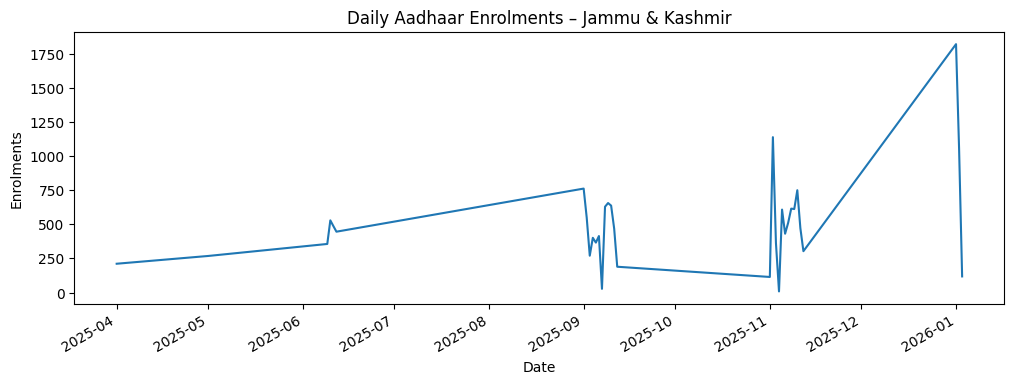

In [32]:
import matplotlib.pyplot as plt

daily_enrolments['total'].plot(figsize=(12,4))
plt.title("Daily Aadhaar Enrolments – Jammu & Kashmir")
plt.ylabel("Enrolments")
plt.xlabel("Date")
plt.show()


In [ ]:
# Long flat regions = no enrolment activity
# Sudden peaks = short enrolment drives

In [33]:
# Age-Group Enrolment Gap (CRITICAL)

# Children should ideally be enrolled early.

age_distribution = jk_df[['Age_0_5','Age_5_17','Age_18_greater']].sum()

age_distribution

,0
Age_0_5,42966
Age_5_17,9530
Age_18_greater,489


In [35]:
# Compare with Kerala (benchmark state):

kerala_df = df[df['State'] == 'Kerala']

comparison = pd.DataFrame({
    'Jammu & Kashmir': age_distribution,
    'Kerala': kerala_df[['Age_0_5','Age_5_17','Age_18_greater']].sum()
})

comparison

,Jammu & Kashmir,Kerala
Age_0_5,42966,14423
Age_5_17,9530,6405
Age_18_greater,489,539


In [36]:
# Interpretation:

# Lower Age_0_5 → delayed child enrolment

# Higher 18+ → catch-up enrolment in adulthood

In [37]:
# District-Level Enrolment Inequality
district_enrolments = jk_df.groupby('District')[['Age_0_5','Age_5_17','Age_18_greater']].sum()
district_enrolments['total'] = district_enrolments.sum(axis=1)

district_enrolments.sort_values('total').head(10)


# 📌 This identifies underserved districts.

,Age_0_5,Age_5_17,Age_18_greater,total
District,,,,
punch,1,0,0,1
Leh,170,52,1,223
Kargil,407,176,1,584
Samba,617,62,10,689
Shupiyan,626,157,3,786
Budgam,886,68,15,969
Ganderbal,929,87,10,1026
Kulgam,1192,319,9,1520
Kishtwar,1222,298,9,1529


In [38]:
# Pincode Access Gaps (Very Strong Insight)
pincode_enrolments = jk_df.groupby('Pincode')[['Age_0_5','Age_5_17','Age_18_greater']].sum()
pincode_enrolments['total'] = pincode_enrolments.sum(axis=1)

low_access = pincode_enrolments[pincode_enrolments['total'] < pincode_enrolments['total'].quantile(0.1)]
low_access.head()


# 📌 These pincodes can be tagged as:

# “Low Aadhaar Enrolment Access Zones”

,Age_0_5,Age_5_17,Age_18_greater,total
Pincode,,,,
180011,17,9,0,26
180012,0,2,1,3
180016,11,5,0,16
180019,3,1,0,4
181121,18,7,0,25


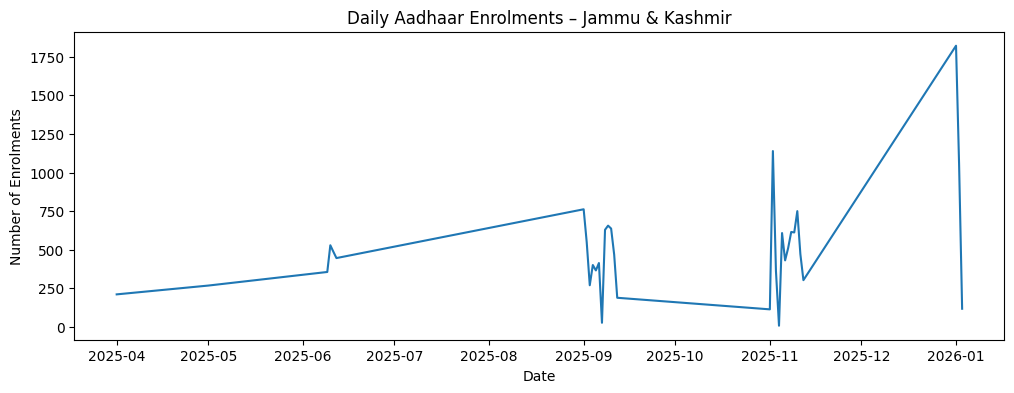

In [39]:
import matplotlib.pyplot as plt

jk_df['Date'] = pd.to_datetime(jk_df['Date'])

daily = jk_df.groupby('Date')[['Age_0_5','Age_5_17','Age_18_greater']].sum()
daily['Total'] = daily.sum(axis=1)

plt.figure(figsize=(12,4))
plt.plot(daily.index, daily['Total'])
plt.title("Daily Aadhaar Enrolments – Jammu & Kashmir")
plt.xlabel("Date")
plt.ylabel("Number of Enrolments")
plt.show()


Insight

Long flat lines → no enrolment activity

Sudden sharp peaks → short enrolment drives

Indicates non-continuous service availability

🧠 Terrorism / Security Angle (Safely Framed)

In security-sensitive regions:

Enrolment camps may operate only during safe windows

Movement restrictions → interrupted enrolment

💡 Suggestion

Use historical enrolment gaps to predict safe and effective enrolment windows and pre-plan Aadhaar enrolment camps accordingly.

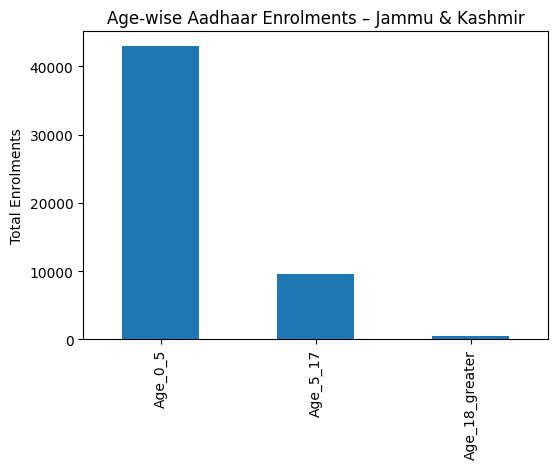

In [40]:
age_sum = jk_df[['Age_0_5','Age_5_17','Age_18_greater']].sum()

plt.figure(figsize=(6,4))
age_sum.plot(kind='bar')
plt.title("Age-wise Aadhaar Enrolments – Jammu & Kashmir")
plt.ylabel("Total Enrolments")
plt.show()


Insight

Lower Age_0_5 → delayed child enrolment

Higher 18+ → late or catch-up enrolments

Children are disproportionately affected

🧠 Terrorism / Security Angle

Families in unstable regions may:

Delay infant enrolment

Avoid travel during unsafe periods

💡 Suggestion

Prioritise child-focused enrolment drives during stable periods to avoid lifelong identity delays.

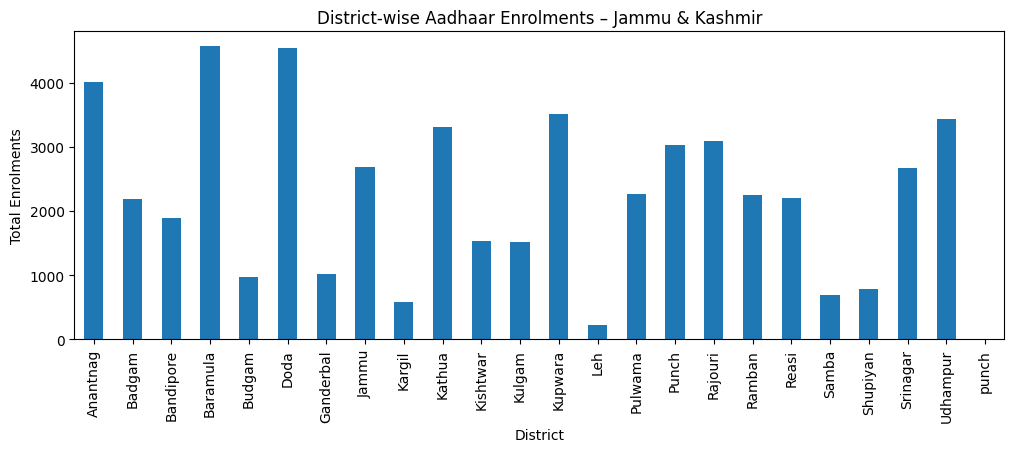

In [41]:
district = jk_df.groupby('District')[['Age_0_5','Age_5_17','Age_18_greater']].sum()
district['Total'] = district.sum(axis=1)

district['Total'].plot(kind='bar', figsize=(12,4))
plt.title("District-wise Aadhaar Enrolments – Jammu & Kashmir")
plt.ylabel("Total Enrolments")
plt.show()


🔍 Insight

Some districts show consistently low enrolment

Indicates uneven access to enrolment services

🧠 Terrorism / Security Angle

Certain districts may be:

Harder to reach due to security concerns

Served less frequently

💡 Suggestion

Build a District Aadhaar Access Index to identify underserved regions and allocate enrolment resources proportionally.

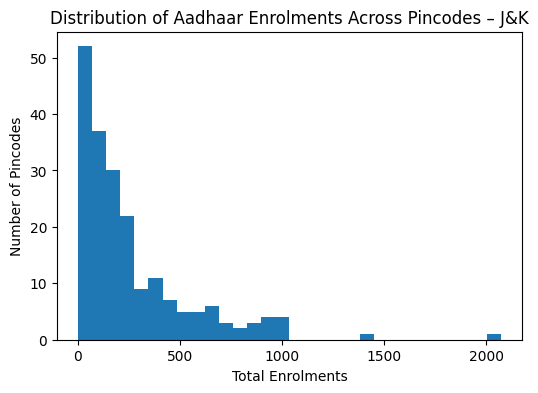

In [42]:
pincode = jk_df.groupby('Pincode')[['Age_0_5','Age_5_17','Age_18_greater']].sum()
pincode['Total'] = pincode.sum(axis=1)

low_pincode = pincode[pincode['Total'] < pincode['Total'].quantile(0.1)]

plt.figure(figsize=(6,4))
plt.hist(pincode['Total'], bins=30)
plt.title("Distribution of Aadhaar Enrolments Across Pincodes – J&K")
plt.xlabel("Total Enrolments")
plt.ylabel("Number of Pincodes")
plt.show()


🔍 Insight

Long tail of low-enrolment pincodes

Some areas consistently underserved

🧠 Terrorism / Security Angle

Low enrolment pincodes may correspond to:

Border areas

High-risk or restricted zones

💡 Suggestion

Classify such regions as Low Aadhaar Access Zones and schedule targeted enrolment outreach.

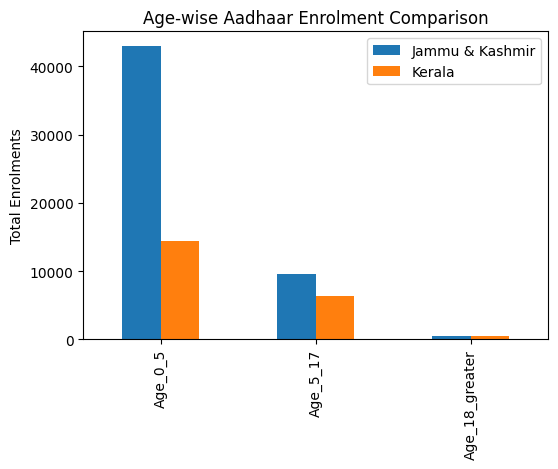

In [43]:
kerala_df = df[df['State'] == 'Kerala']

comparison = pd.DataFrame({
    'Jammu & Kashmir': jk_df[['Age_0_5','Age_5_17','Age_18_greater']].sum(),
    'Kerala': kerala_df[['Age_0_5','Age_5_17','Age_18_greater']].sum()
})

comparison.plot(kind='bar', figsize=(6,4))
plt.title("Age-wise Aadhaar Enrolment Comparison")
plt.ylabel("Total Enrolments")
plt.show()


🔍 Insight

Kerala shows balanced enrolment

J&K shows delayed & uneven enrolment

🧠 Terrorism / Security Angle

Demonstrates how stable vs sensitive regions differ in enrolment continuity

💡 Suggestion

Use high-performing states as benchmarks for best-practice enrolment planning.